In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import bokeh
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from ipywidgets import interact, interact_manual
from bokeh.palettes import Spectral11
from bokeh.io import output_notebook
from random import choice

In [9]:
path1 = "/Users/Jenny/Desktop/Github/homework-3-jeonglimkim-1/IVY_level_of_studyTuition_type.csv"
path2 = "/Users/Jenny/Desktop/Github/homework-3-jeonglimkim-1/IVY_institutions.csv"
path3 = "/Users/Jenny/Desktop/Github/homework-3-jeonglimkim-1/IVY_award_level.csv"
path4 = "/Users/Jenny/Desktop/Github/homework-3-jeonglimkim-1/IVY_living_arrangement.csv"

In [10]:
tuition = pd.read_csv(path1)
enrollment = pd.read_csv(path2)
award = pd.read_csv(path3)
living = pd.read_csv(path4)

# Average Acceptance Rate 

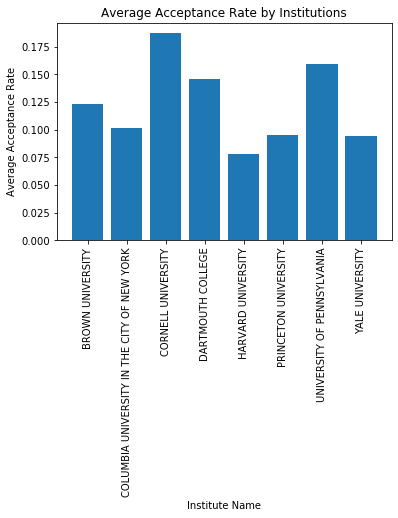

In [11]:
enrollment['inst_name'] = enrollment['inst_name'].str.upper()
enrollment = enrollment[enrollment.inst_name != 'CORNELL UNIVERSITY-ENDOWED COLLEGES']

nan_value = float("NaN")
enrollment['number_admitted'].replace("", nan_value, inplace=True)
enrollment['number_applied'].replace("", nan_value, inplace=True)
enrollment.dropna(subset=['number_admitted','number_applied'], inplace=True)

enrollment['acceptance'] = enrollment['number_admitted']/enrollment['number_applied']
grouped_tr = enrollment['acceptance'].groupby(enrollment['inst_name']) 
grouped_tr = grouped_tr.mean()

fig, ax = plt.subplots()
ax.bar(grouped_tr.index, grouped_tr.values)
ax.set_title('Average Acceptance Rate by Institutions')
ax.set_ylabel('Average Acceptance Rate')
ax.set_xlabel('Institute Name')
plt.xticks(rotation=90)
plt.show()

# Average Total Expense

(-1.1048457718016715,
 1.1049814401789955,
 -1.1065467741532111,
 1.1003117828613762)

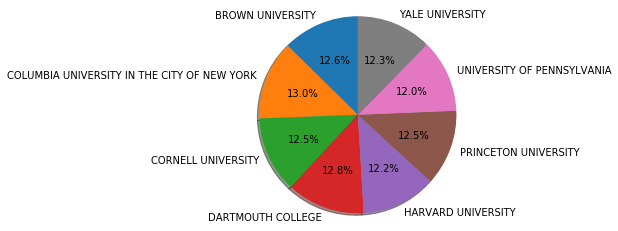

In [12]:
living['inst_name'] = living['inst_name'].str.upper() 
living = living[living.inst_name != 'CORNELL UNIVERSITY-ENDOWED COLLEGES']
tuition['inst_name'] = tuition['inst_name'].str.upper() 
tuition = tuition[tuition.inst_name != 'CORNELL UNIVERSITY-ENDOWED COLLEGES']

nan_value = float("NaN")
living.replace("", nan_value, inplace=True) 
tuition.replace("", nan_value, inplace=True) 
living.dropna(subset=['books_supplies','room_board','exp_other'], inplace=True) 
tuition.dropna(subset=['tuition_fees_ft'], inplace=True) 

living['on-campus_sum'] = living['books_supplies'] + living['room_board'] + living['exp_other']

grouped_liv = living['on-campus_sum'].groupby(living['inst_name'])
grouped_liv = grouped_liv.mean()

grouped_tui= tuition['tuition_fees_ft'].groupby(tuition['inst_name'])
grouped_tui = grouped_tui.mean()

grouped_total = grouped_tui + grouped_liv
fig1, ax1 = plt.subplots()
ax1.pie(grouped_total.values, labels= grouped_total.index, autopct='%1.1f%%',
        shadow=True, startangle=90) 
ax1.axis('equal')

# Number of Enrollment Trend

In [13]:
output_notebook()

uni_list = enrollment['number_enrolled_total'].groupby([enrollment['inst_name']]).mean().index


# # https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html
fig = figure(plot_width = 1000, plot_height = 400)
fig.title.text = 'The number of enrolled'


@interact(university = uni_list)
def make_plot_for(university = uni_list[0]):

    sub_insti = enrollment[enrollment['inst_name'].str.contains(university)] 
    grouped_et = sub_insti['number_enrolled_total'].groupby(sub_insti['year']).mean()
    fig.line(grouped_et.index, grouped_et.values,line_width=2, color = choice(Spectral11), alpha=0.8, legend_label=university)
    fig.legend.location = "top_left" 
    fig.legend.click_policy="hide" 
    show(fig)



# Bachelor's Degree Award Trend

In [14]:
output_notebook()

award = award[award.inst_name != 'CORNELL UNIVERSITY-ENDOWED COLLEGES']
award['inst_name'] = award['inst_name'].str.upper() 

nan_value = float("NaN")
award.replace("", nan_value, inplace=True)
award.dropna(subset=['awards', 'award_level'], inplace=True) 
award = award[award['award_level'].str.contains("Bachelor")] 

uni_list2 = award['awards'].groupby(award['inst_name']).mean().index

fig = figure(plot_width=800, plot_height=300)
fig.title.text = 'Bachelor\'s degree'

@interact(university = uni_list2)
def make_graph_for(university = uni_list2[0]):
    sub_award = award[award['inst_name'].str.contains(university)]
    grouped_award = sub_award['awards'].groupby(sub_award['year']).mean()
    fig.line(grouped_award.index, grouped_award.values, line_width=2, color=choice(Spectral11), alpha= 0.8, legend_label=university)
    fig.legend.location = "top_left" 
    fig.legend.click_policy="hide" 
    show(fig)


One of the most difficult portions of this assignment was generating data that can bring meaningful analysis to education policy. With limited instructions, it took considerable amount of time to hunt for the 'right' data and brainstorm valuable research questions. When it comes to coding the actual graphs, figures, and plots, I learned coding does not have a fast track. I need to take a step-by-step method from really understanding each variable to outlining my logic to code in order to achieve the desired final outcome. I believe formulating data visualization is very important when it comes to evaluating and presenting data. Through this assignment, however, I also learned to believe that data visualization can be overly simple that a graph alone should not be the only source to making decisions. I personally enjoyed making plots using the bokeh and its interactivity, and I wish to take further usage of it in the future.  